# **The influence of conflict and volatility on decision-making**

## **Background**

Performing successfully in a changing environment requires making fast, accurate decisions and updating those decisions given the feedback that you receive. For example, imagine that you’re a coffee lover. You’re in luck! Your favorite coffee shop has two single-origin beans that you enjoy — an Ethiopian and a Jamaican light roast. You might be conflicted about your choice and take longer than usual to decide, and because both of these beans are nearly equally valuable to you, you may not choose the beans that you would have liked best. Imagine that it’s the next week and you make your usual morning visit. Because of unseasonably dry growing conditions in Jamaica, the beans that you previously liked almost as much as the Ethiopian beans taste odd, so on your next visit, you vastly prefer the alternative. How does your estimate of whether the taste of your favorite bean has changed (volatility) interact with the value you place on each type of bean (decision-conflict)? Broadly, how do estimates of volatility and decision-conflict affect decision-making and learning?
<br>
To more fully understand decision making and learning in an environment with multiple sources of uncertainty, I explore how value conflict between competing actions (the degree to which the value associated with each action is similar) and the volatility of feedback (the change point frequency of mean value-action associations) influence adaptive decision making. 

## **Variables**

### Variables, $p$
*Predictor*<br> 
> *  conflict (high/low, qualitative)<br>
*  volatility (high/low, qualitative)<br>

*Response*<br>
> *  accuracy (qualitative, 0/1)<br>
*  reaction time (quantitative)<br>

### Number of observations, $n$
5 participants with four 1000-trial sessions each.
<br><br>
 ### Method of data collection 
 In the task, we operationally define **conflict** as the mean reward difference between actions and **volatility** as the rate of change in that mean reward difference. We manipulated factors of volatility and conflict using a 2x2 within-subjects design to form four conditions, with each participant performing 1000 trials per condition and one condition per day until all conditions were complete.    

Reaction time and choice accuracy data were collected using a two-alternative forced-choice task written in PsychoPy. On each trial, participants were asked to choose the highest-reward target within 1 s. Then they were shown the reward earned on each trial based on their decision. To prevent prepotent selections, the position of the rewarding target was  randomized across trials, with the target identity as the rewarding feature (rather than target position). The instruction screen and the structure of a sample trial are below: 
<tr><td><img src='instructions.png' style='width: 700px;'></td><td><img src='task.png' style='width: 700px;'></td></tr>

## **Hypotheses**

A mixed effects logistic regression will evaluate my hypotheses regarding accuracy. Here $c$ is an indicator variable (high conflict = 1 and low conflict = 0), $v$ is an indicator variable (high volatility = 1 and low volatility = 0) and $id$ represents the subject ID: 

$$\hat{a} = \hat{\beta_0} + \hat{\beta_c}c + \hat{\beta_v}v + \hat{\beta_{cv}}cv + (1|id)$$

High volatility conditions will increase the log odds of making the correct choice relative to low volatility conditions, so $\hat{\beta_v}$ would be positive and significantly different from zero. High conflict conditions will decrease the log odds of making the correct choice relative to low conflict conditions, so $\hat{\beta_c}$ would be negative and significantly different from zero. Interaction effects may also exist such that conflict modifies the effect of volatility on the log odds of accuracy. 


<br>
A mixed effects linear regression will evaluate my hypotheses regarding reaction times: 

$$\hat{r} = \hat{\beta_0} + \hat{\beta_c}c + \hat{\beta_v}v + \hat{\beta_{cv}}cv + (1|id)$$

High volatility conditions will increase reaction time more quickly relative to low volatility conditions, so $\hat{\beta_v}$ would be positive and significantly different from zero. High conflict conditions will delay and subdue the expression of reaction time increases relative to low conflict conditions, so $\hat{\beta_c}$ would be negative and significantly different from zero. Interaction effects may also exist such that conflict modifies the effect of volatility on reaction time. 

## **Data organization**

### Data Architecture 

All behavioral data and metadata are stored within a Dropbox folder.  Each data file is named according to subject, condition, and trial set ID. For example, if my subject number was 123, my condition number was 0, and the trial set ID was 0, then my data file would be named *123_cond0_trialset0.csv*. Additionally, for each subject, system- and experiment-related metadata, such as the last computer reboot time, the versions of key modules for the experiment, the total length of the experiment for that session, and  the length of the mid-experiment break, is recorded in a separate csv file with *runInfo* appended to the file name, as below.
![image.png](data_arch.png)

In [ ]:
example_metadata <- read.csv("test_cond0_trialset0_runInfo.csv")
head(example_metadata)

Within the behavioral data file, key variables are stored within columns:
> * the left/right **choice** is coded as 0 or 1
> * the **accuracy** is coded as 0 (incorrect) or 1 (correct)
> * the choice corresponding to the highest point value is stored as the **solution**
> * the number of points earned on each trial is stored as **reward**
> * the reward accumulated across the experiment so far is stored as **cumulative_reward**
> * the reaction time for each trial is stored as **rt**
> * the trial time, including feedback time, is stored as **total_trial_time** 
> * the intertrial interval is stored as **iti**
> * the change point indicator (0/1) is stored with slow trial (-1) and fast trial (-2) indicators as **cp_with_slow_fast**
> * and the ASCII value for the color of the high-value cue is stored as **high_val_cue**

In [ ]:
example_data <- read.csv("test_cond0_trialset0.csv")
head(example_data)

### Data Table Structure

My data table is in the tidy data format, with columns for subject ID, condition, reaction time, and accuracy. Each observation is a single row and the header of the data table refers to the names of the variables. Because I only have one type of observational unit (the participant), I store all of the data within a single data table. 

In [111]:
clean_df <- read.csv("cleaned_valC_data.csv")
colnames(clean_df)[1] <- 'trial'
sparse_df <- clean_df[,c("trial", "ID","condition","rt","accuracy")]
raw_df <- read.csv("raw_valC_data.csv")
colnames(raw_df)[1] <- 'trial'

In [115]:
#recast as factors instead of condition labels 
library(tidyverse)

sparse_df$volatility <- sparse_df$condition
sparse_df$conflict <- sparse_df$condition

sparse_df$volatility <- recode(sparse_df$volatility,
  "hvlc" = 1,
  "hvhc" = 1, 
  "lvhc" = 0,
   "lvlc" = 0,
  )

sparse_df$conflict<- recode(sparse_df$conflict,
  "hvlc" = 0,
  "hvhc" = 1, 
  "lvhc" = 1,
   "lvlc" = 0,
  )

sparse_df$conf.vol <- factor(sparse_df$conflict*sparse_df$volatility)
sparse_df$conflict <- factor(sparse_df$conflict)
sparse_df$volatility <- factor(sparse_df$volatility)

In [117]:
levels(sparse_df$conflict); levels(sparse_df$volatility); levels(sparse_df$conf.vol)
head(sparse_df); tail(sparse_df)

[1] "0" "1"

[1] "0" "1"

[1] "0" "1"

trial,ID,condition,rt,accuracy,volatility,conflict,conf.vol
1,758,lvhc,0.2779109,1,0,1,0
2,758,lvhc,0.4092290,1,0,1,0
3,758,lvhc,0.3257351,1,0,1,0
4,758,lvhc,0.3317959,1,0,1,0
5,758,lvhc,0.2648199,1,0,1,0
6,758,lvhc,0.3168850,1,0,1,0


,trial,ID,condition,rt,accuracy,volatility,conflict,conf.vol
19995,998,759,hvhc,0.3522038,1,1,1,1
19996,999,759,hvhc,0.3516970,1,1,1,1
19997,1000,759,hvhc,0.3336740,1,1,1,1
19998,1001,759,hvhc,0.3177171,1,1,1,1
19999,1002,759,hvhc,0.3874722,1,1,1,1
20000,1003,759,hvhc,0.3671570,1,1,1,1


### Data Cleansing & Tidying 

#### Syntactic errors  
**Lexical**: Because the behavioral data is written to lists which are concatenated, there would be a concatenation error if they were of different sizes that would prevent saving the data, so I don't expect there to be any discrepancies between the intended and actual data structure format. However, it is possible that the values for two variables could be switched without affecting the size of the list, but I check for this below. 

**Domain format errors and irregularities**: Because all of the data is written at once, I don't expect there to be formatting inconsistencies, but I check for this type of error.

#### Semantic errors
**Integrity constraint violations**: Will check that reaction times are within the minimum (.1 s) and maximum (1 s) set within the experiment. Because the trial should end with a timing message if either the max. or min. reaction time is recorded, if reaction times associated with a non-repeated trial are greater than the maximum or less than the minimum, then a) the reaction time was recorded incorrectly or b) the experiment did not operate as intended. I will check that accuracy, solution, and choice values are all either 0 or 1 and that the high value cue is always either one of the two ASCII values for the colors of the stimuli presented. 

In [4]:
library(tidyverse)
head(clean_df,2)

trial,reward,total_trial_time,accuracy,cp_with_slow_fast,cumulative_reward,high_val_cue,iti,rt,solution,choice,ID,condition
1,62,1.571029,1,0,62,112,0.2876267,0.2779109,1,1,758,lvhc
2,55,2.015825,1,0,117,112,0.6198438,0.4092290,1,1,758,lvhc


**Contradictions**: I will recalculate accuracy from the choice and the solution values to ensure that the accuracy variable does not represent a contradiction. I will ensure that if the experimental constraints on reaction time are not met on a given trial,  the trial is flagged appropriately (-1 or -2 for fast for slow trials), reward is 0, and that the trial is repeated (total n_trials for each participant is 1000 without fast/slow trials). Additionally, I will check that total trial time is always greater than the recorded reaction time, that cumulative reward is always increasing, and that when the cp_with_fast_slow indicator is 1 (indicating a change point), then the ASCII value for the high value cue also changes. 
<br>
**Duplicates**: While some trials should repeat given an out-of-bounds reaction time, I check for repeated recordings of the same trial by finding whether any trial within a subject has repeated values for both reaction time (which has a high degree of precision) and cumulative reward (which should always increase). 
<br>
**Invalid tuples**: I will check that accuracy is moderately variable within a given subject. Given the probabilistic nature of the task, I would not expect a subject to have either perfect accuracy or for that subject to have all incorrect trials. 

#### Coverage 
**Missing values & missing tuples**: Missing values within a variable should not be a problem because the data would not save due to a concatenation error. Missing data vectors also should not be a problem because of the automated data collection, but I check that the data from each subject matches the expected size (number of trials by number of variables) below. 

In [24]:
#accuracy should be moderately variable 
sparse_df %>% 
# group_by(condition, ID) %>% 
group_by(volatility) %>% 
summarise (mean_acc = mean(accuracy), std_acc = sd(accuracy))

sparse_df %>% 
group_by(conflict) %>% 
summarise (mean_acc = mean(accuracy), std_acc = sd(accuracy))

volatility,mean_acc,std_acc
0,0.9621,0.190964
1,0.9146,0.279490


conflict,mean_acc,std_acc
0,0.9531,0.2114352
1,0.9236,0.2656503


In [20]:
sparse_df %>% 
group_by(conflict) %>% 
summarise (mean_rt = mean(rt), std_rt = sd(rt))

sparse_df %>% 
# group_by(condition, ID) %>% 
group_by(volatility) %>% 
summarise (mean_rt = mean(rt), std_rt = sd(rt))

conflict,mean_rt,std_rt
0,0.3286749,0.08147595
1,0.3332893,0.08440134


volatility,mean_rt,std_rt
0,0.3299570,0.0806880
1,0.3320071,0.0852051


## **Analysis**

In [26]:
head(sparse_df)

trial,ID,condition,rt,accuracy,volatility,conflict
1,758,lvhc,0.2779109,1,0,1
2,758,lvhc,0.4092290,1,0,1
3,758,lvhc,0.3257351,1,0,1
4,758,lvhc,0.3317959,1,0,1
5,758,lvhc,0.2648199,1,0,1
6,758,lvhc,0.3168850,1,0,1


Picking joint bandwidth of 0.00961
Picking joint bandwidth of 0.00951
Picking joint bandwidth of 0.00956
Picking joint bandwidth of 0.0112
Picking joint bandwidth of 0.0149


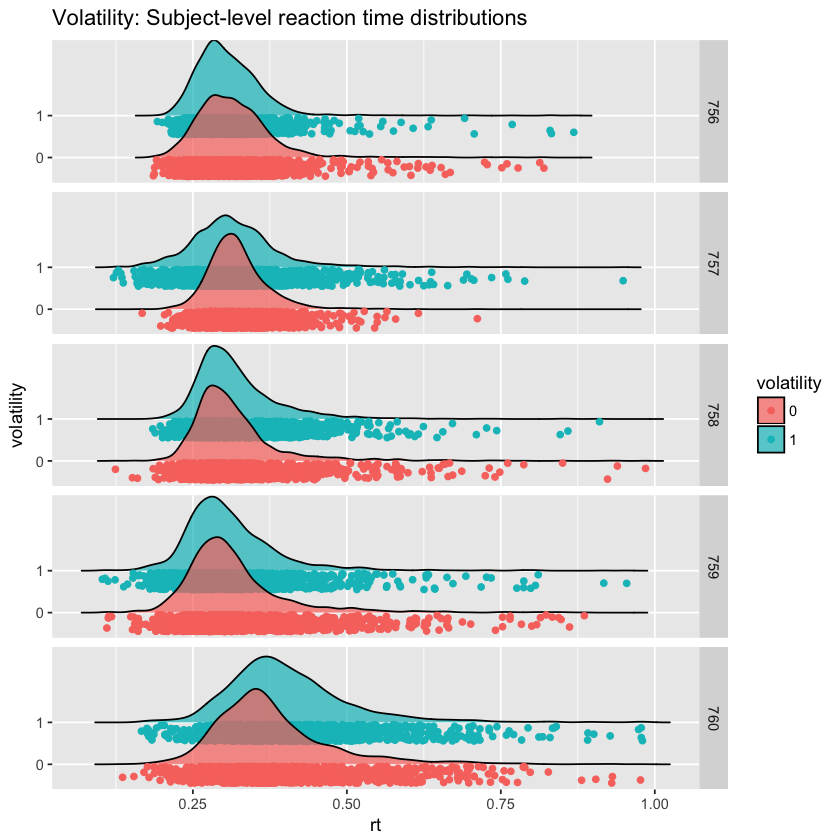

In [377]:
library(ggridges)
library(ggthemes)

ggplot(sparse_df, aes(rt,volatility, fill=volatility)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = volatility, point_fill = volatility)) + facet_grid(ID ~.) + ggtitle('Volatility: Subject-level reaction time distributions ') 
# + theme_tufte()

Picking joint bandwidth of 0.00973
Picking joint bandwidth of 0.00923
Picking joint bandwidth of 0.00941
Picking joint bandwidth of 0.0109
Picking joint bandwidth of 0.0153


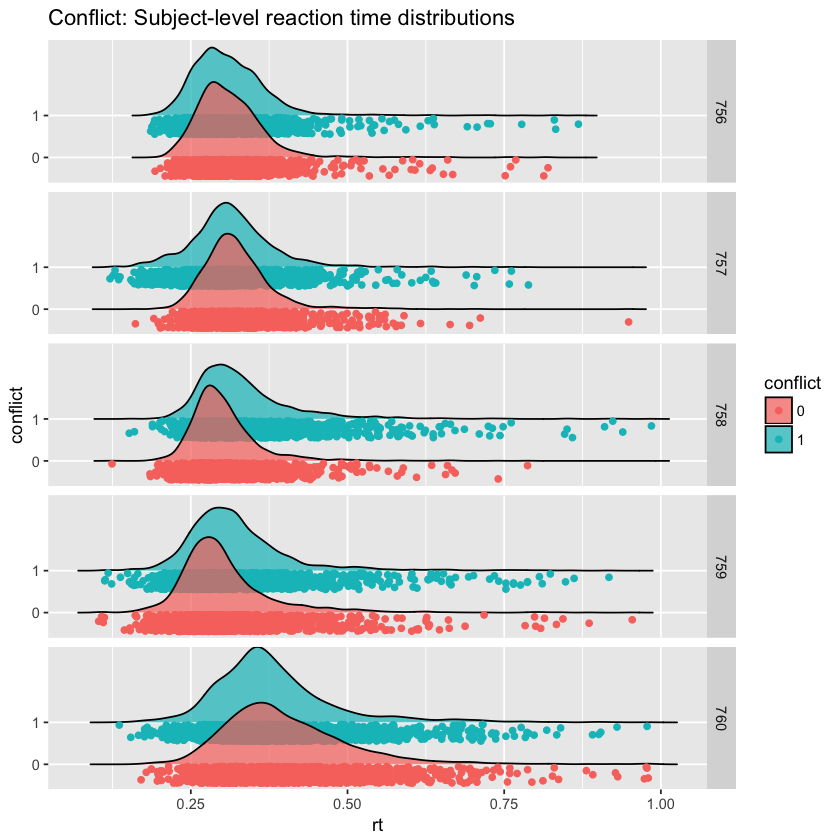

In [376]:

ggplot(sparse_df, aes(rt,conflict, fill=conflict)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = conflict, point_fill = conflict)) + facet_grid(ID ~.) + ggtitle('Conflict: Subject-level reaction time distributions ') 
# + theme_tufte()

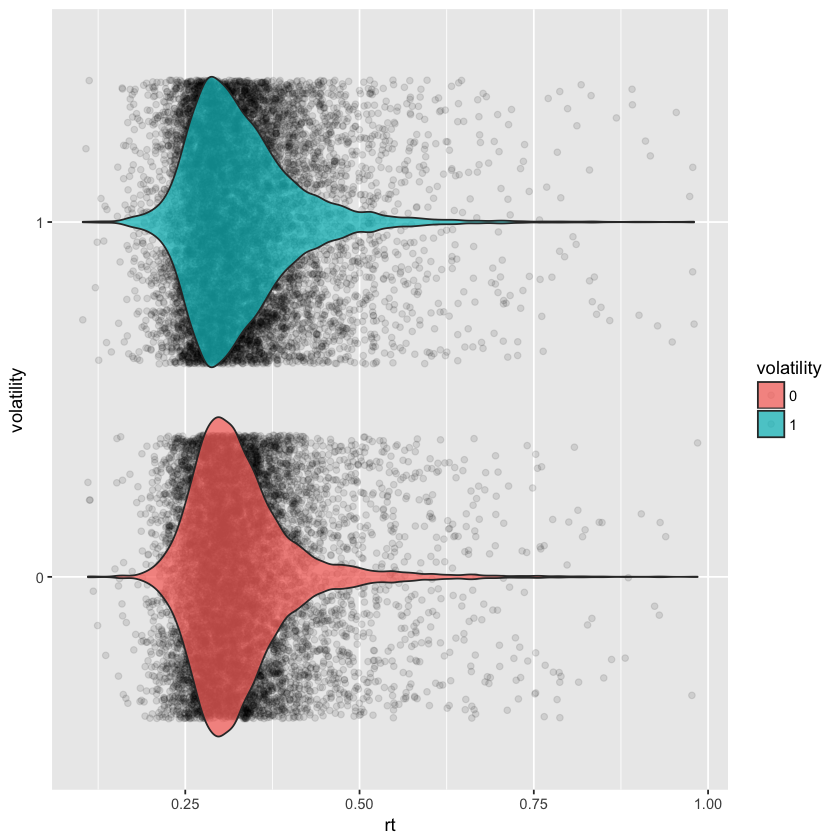

In [379]:
ggplot(sparse_df, aes(x = volatility, y = rt, fill=volatility)) +
  geom_jitter(alpha = .1) +
  geom_violin(alpha = .75) + coord_flip() 

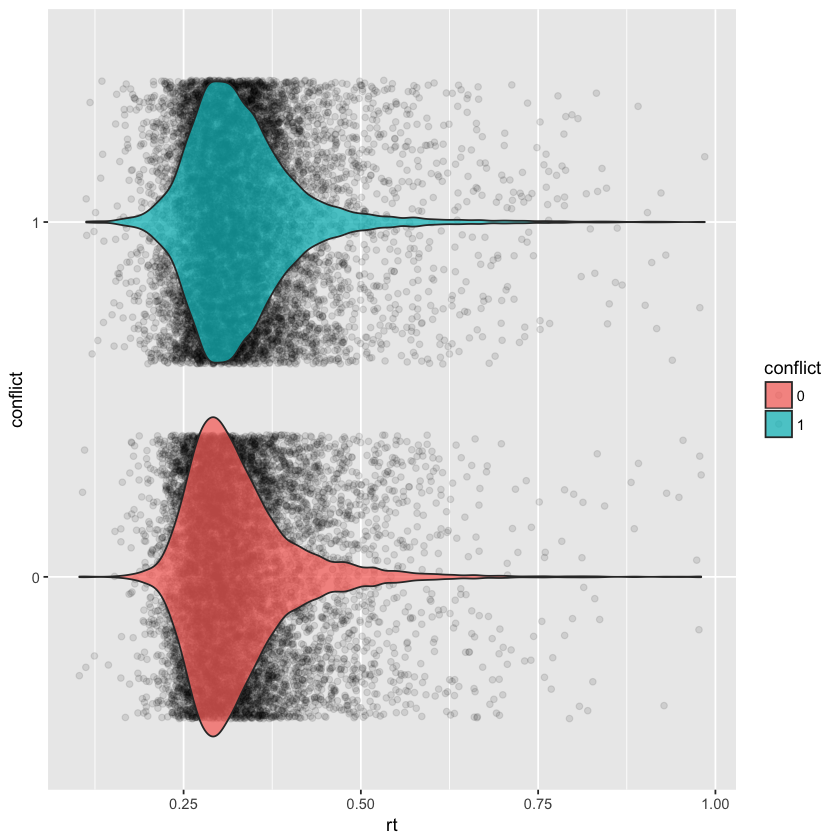

In [380]:
ggplot(sparse_df, aes(x = conflict, y = rt, fill=conflict)) +
  geom_jitter(alpha = .1) +
  geom_violin(alpha = .75) + coord_flip() 

In [381]:
vol_acc_stats <- sparse_df %>% 
    group_by(ID, volatility) %>% summarize(mu_acc=mean(accuracy))
conf_acc_stats <- sparse_df %>% 
    group_by(ID, conflict) %>% summarize(mu_acc=mean(accuracy))

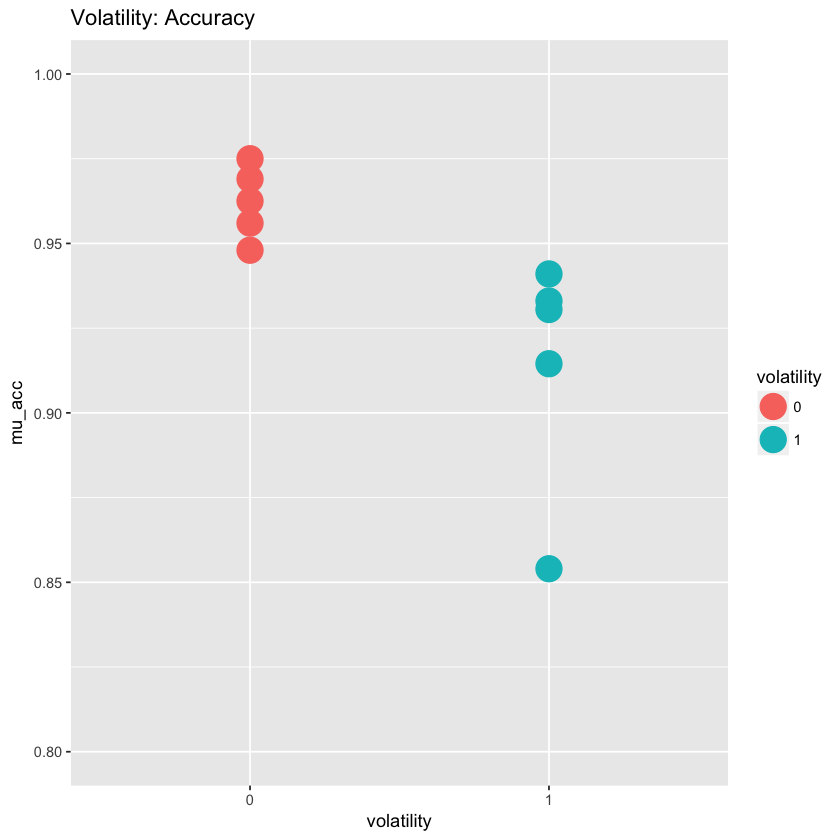

In [598]:
ggplot(vol_acc_stats, aes(x = volatility, y = mu_acc, color = volatility)) + 
    geom_point(position = position_dodge(width = 0.4),size=7) + ylim(0.8,1) + ggtitle('Volatility: Accuracy')

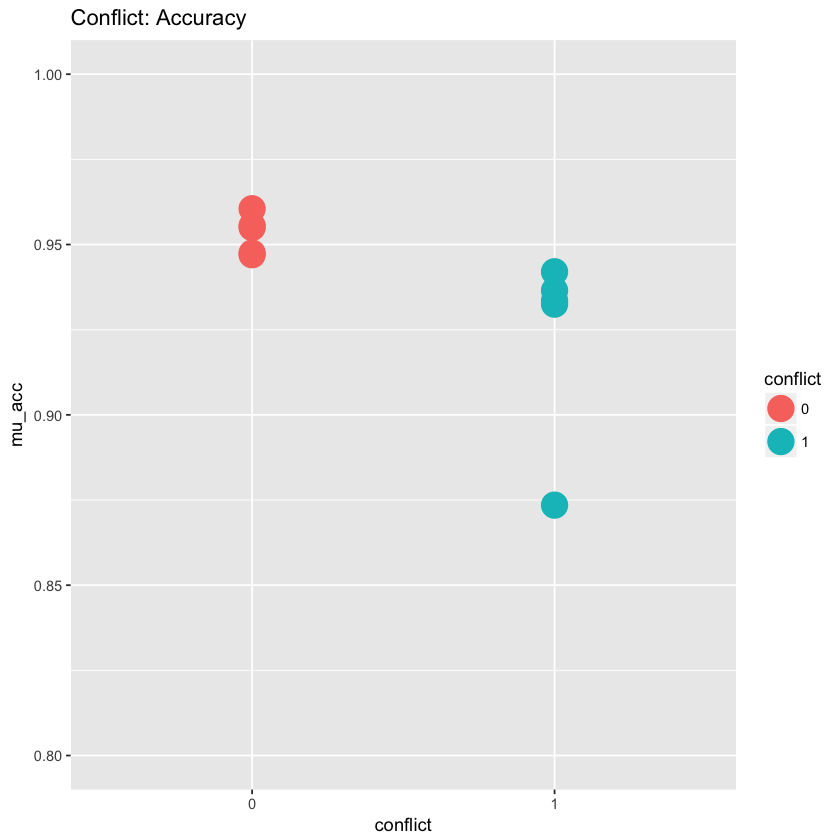

In [599]:
ggplot(conf_acc_stats, aes(x = conflict, y = mu_acc, color = conflict)) + 
    geom_point(position = position_dodge(width = 0.4),size=7) + ylim(0.8,1)+ ggtitle('Conflict: Accuracy')

## Conduct mixed effects logistic regression for accuracy

In [427]:
require(lme4)

acc_formula <-accuracy ~ volatility + conflict + conf.vol + 
    (1 | ID)
# estimate a mixed effects logistic regression model and store results in acc_log
acc_log <- lmer(acc_formula, data = sparse_df, family = binomial, control = lmerControl(optimizer = "bobyqa"),
    nAGQ = 10)

log_results <- fixef(acc_log)
# summary(acc_log)
print(log_results)

Warning message in lmer(acc_formula, data = sparse_df, family = binomial, control = lmerControl(optimizer = "bobyqa"), :
“calling lmer with 'family' is deprecated; please use glmer() instead”Warning message in lme4::glmer(formula = acc_formula, data = sparse_df, control = lmerControl(optimizer = "bobyqa"), :
“please use glmerControl() instead of lmerControl()”

(Intercept) volatility1   conflict1   conf.vol1 
 3.57222680 -0.90629604 -0.56799984  0.06157041 


In [495]:
summary(acc_log)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 10) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy ~ volatility + conflict + conf.vol + (1 | ID)
   Data: sparse_df
Control: lmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  8959.0   8998.5  -4474.5   8949.0    19995 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4471  0.1659  0.2440  0.3130  0.4032 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.03563  0.1888  
Number of obs: 20000, groups:  ID, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.57223    0.12067  29.604  < 2e-16 ***
volatility1 -0.90630    0.10324  -8.779  < 2e-16 ***
conflict1   -0.56800    0.10858  -5.231 1.68e-07 ***
conf.vol1    0.06157    0.13107   0.470    0.639    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) vltlt

In [428]:
#odds ratios 
(log_results_odds <- exp(log_results))
#probability 
(log_results_prob <- exp(log_results)/(1+exp(log_results)))

#intercept is probability of accurate response when volatility and conflict are 0
#or for the low volatility/low conflict condition 

#as you can see, the probability of an accurate response 
#is high for the low vol/low conflict condition, ~97%

#when volatility is high, the probability of responding accurately reduces to 28%
#and when conflict is high, the prob. of responding accurately is 36%
#when both volatility and conflict are high, the prob. of an accurate response jumps to ~52%

(Intercept) volatility1   conflict1   conf.vol1 
 35.5957695   0.4040179   0.5666577   1.0635054

(Intercept) volatility1   conflict1   conf.vol1 
  0.9726744   0.2877584   0.3616985   0.5153877

In [437]:
#low volatility and low conflict group is 35 times as likely to respond accurately 
#as the high volatility and high conflict group 
log_results_odds
log_results_prob
# when conflict is held constant, 
#the high volatility group is 0.4 times as likely to respond accurately 
#as the low volatlity group

#when volatility is held constant, the high conflict group is .57 times as likely 
#to respond accurately as the low conflict group. 

#when conflict is high and the 

#when the exponentiated coefficient of the interaction terms tells you 
#the ratio by wich the odds ratio changes.
#If a person prefered A previously (PreferA =1) then the odds ratio of treatment increases 
# by a factor exp(2.850)=17.3. So the odds ratio of treatment for those that 
# prefered A previously is 17.3×.099=1.71. 

#in the high conflict condition, 

(Intercept) volatility1   conflict1   conf.vol1 
 35.5957695   0.4040179   0.5666577   1.0635054

(Intercept) volatility1   conflict1   conf.vol1 
  0.9726744   0.2877584   0.3616985   0.5153877

## Bootstrapped confidence in fixed effects of mixed logistic regression 

In [503]:
library(boot)
set.seed(050118)
log_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- glmer(formula, data=d, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)
  return(fixef(fit))
} 


acc_formula <-accuracy ~ volatility + conflict + conf.vol + 
    (1 | ID)

# bootstrapping with 1000 replications 
log_boot_results <- boot(formula=acc_formula, data=sparse_df, 
  	R=1000, statistic=log_coef)

In [561]:
log_boot_results
log_results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sparse_df, statistic = log_coef, R = 1000, formula = acc_formula)


Bootstrap Statistics :
       original        bias    std. error
t1*  3.57222680 -0.0003553879  0.08793385
t2* -0.90629604  0.0056896889  0.10480056
t3* -0.56799984  0.0053185024  0.11048303
t4*  0.06157041 -0.0067008920  0.13266859

(Intercept) volatility1   conflict1   conf.vol1 
 3.57222680 -0.90629604 -0.56799984  0.06157041

In [512]:
# get 95% confidence interval for each coefficient
intercept_boot_ci <-boot.ci(log_boot_results, type="perc", index=1) # intercept 
vol_boot_ci <-boot.ci(log_boot_results, type="perc", index=2) # volatility 
conf_boot_ci <- boot.ci(log_boot_results, type="perc", index=3) # conflict
vol.conf_boot_ci <- boot.ci(log_boot_results, type="perc", index=4) # vol:conflict interaction 

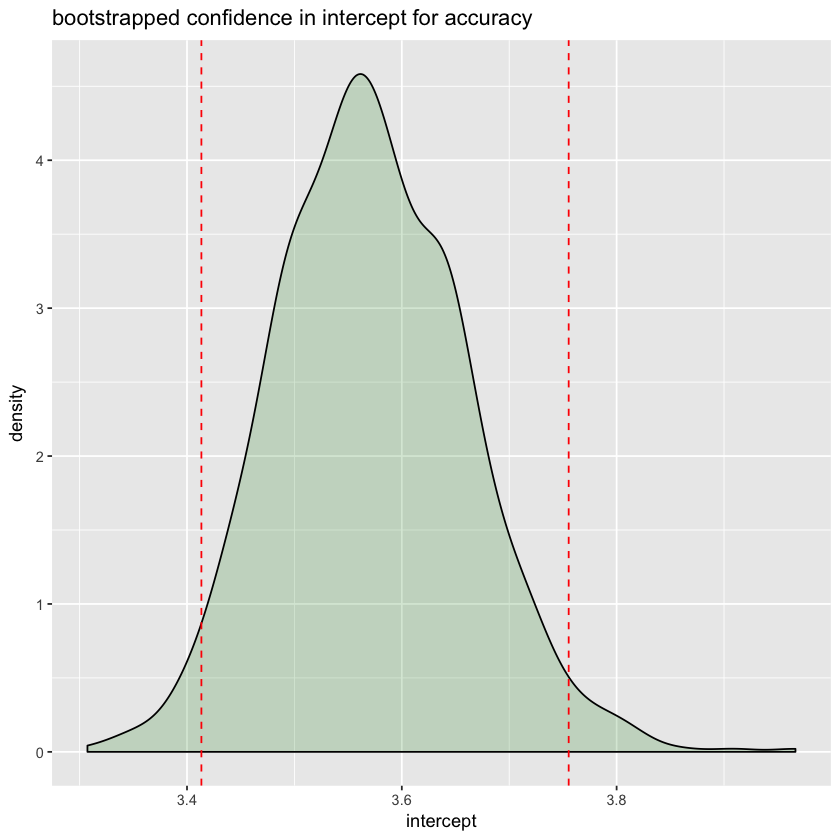

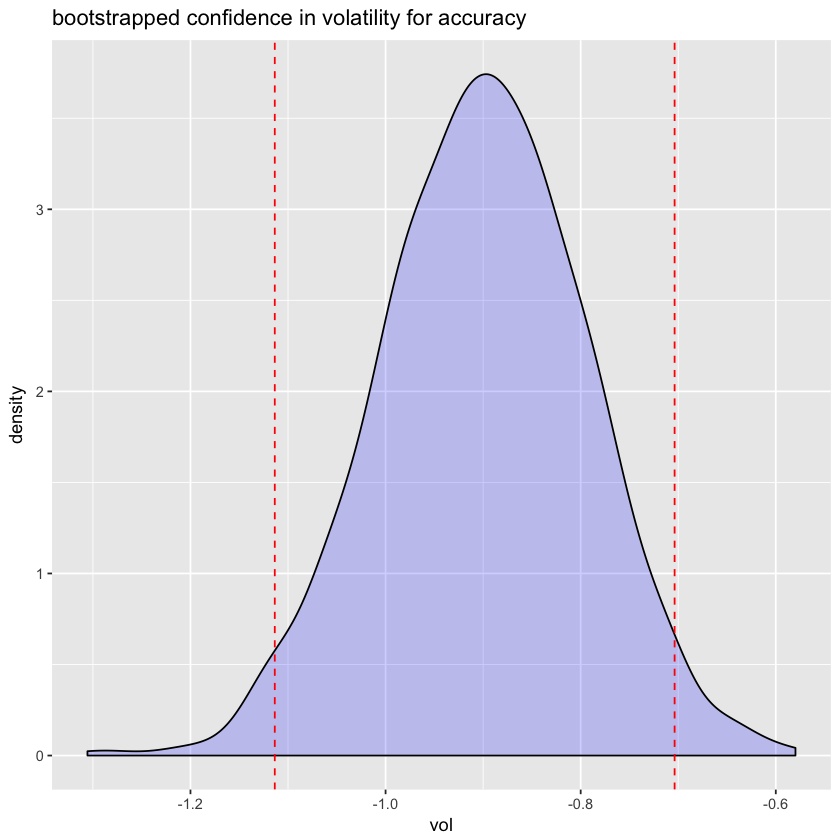

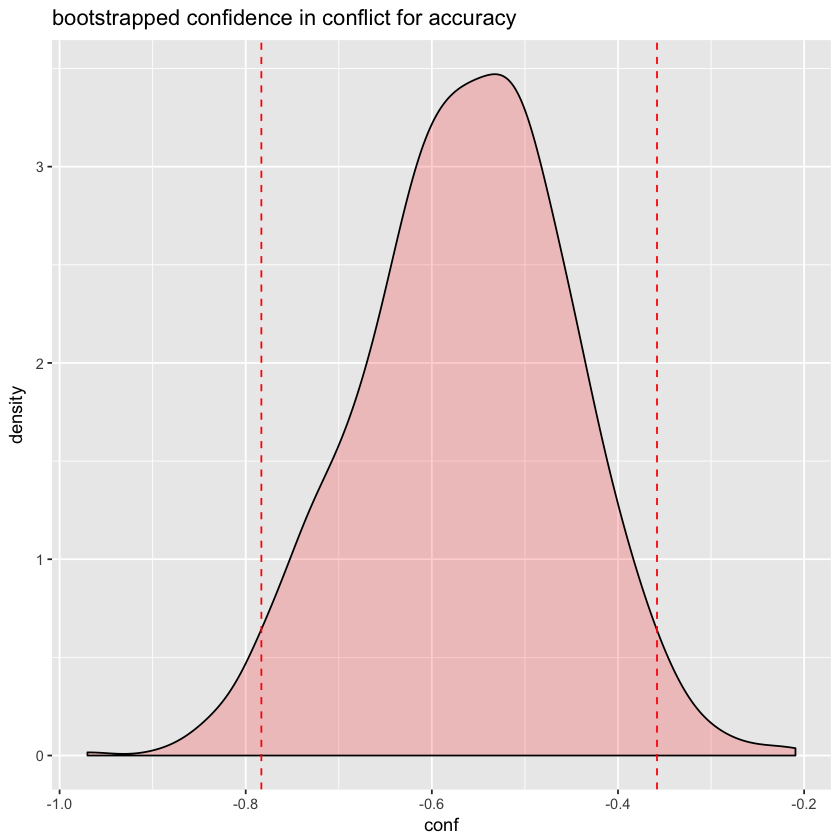

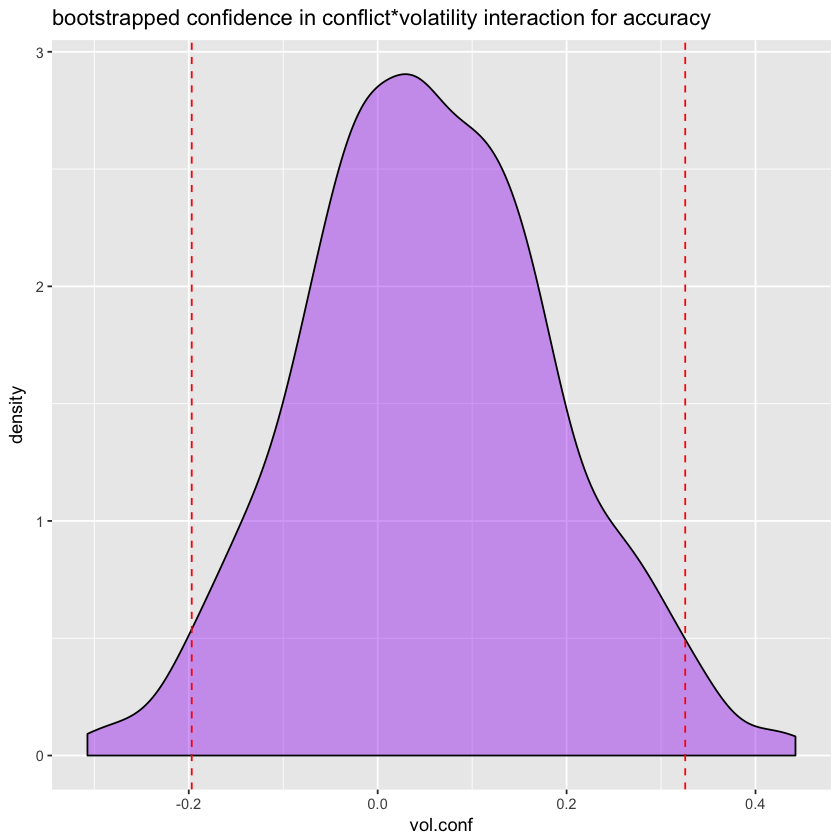

In [607]:
log_boot_coefs <- data.frame(log_boot_results$t)
colnames(log_boot_coefs) <- c('intercept', 'vol', 'conf', 'vol.conf')

ggplot(log_boot_coefs, aes(x = intercept)) + geom_density(fill='forestgreen', alpha=0.2) + 
geom_vline(xintercept=intercept_boot_ci$perc[4:5], linetype='dashed', color='red') + ggtitle('bootstrapped confidence in intercept for accuracy')

ggplot(log_boot_coefs, aes(x = vol)) + geom_density(fill='blue', alpha=0.2) + 
geom_vline(xintercept=vol_boot_ci$perc[4:5], linetype='dashed', color='red')+ ggtitle('bootstrapped confidence in volatility for accuracy')

ggplot(log_boot_coefs, aes(x = conf)) + geom_density(fill='red', alpha=0.2) + 
geom_vline(xintercept=conf_boot_ci$perc[4:5], linetype='dashed', color='red')+ ggtitle('bootstrapped confidence in conflict for accuracy')

ggplot(log_boot_coefs, aes(x = vol.conf)) + geom_density(fill='purple', alpha=0.4) + 
geom_vline(xintercept=vol.conf_boot_ci$perc[4:5], linetype='dashed', color='red')+ ggtitle('bootstrapped confidence in conflict*volatility interaction for accuracy')

## Test null hypotheses using targeted permutations

In [120]:
#permutation testing
permuted_vol_data = sparse_df
permuted_conf_data = sparse_df
permuted_conf.vol_data = sparse_df

#n_iterations
R=1000
n_samples = nrow(sparse_df)

# ncol is the number of coefficients,4 
perm_vol.coefs=matrix(NA,nrow=R, ncol=4)
perm_conf.coefs=matrix(NA,nrow=R, ncol=4)
perm_conf.vol.coefs=matrix(NA,nrow=R, ncol=4)

In [121]:
#scramble volatility 
#null: no relationship between volatility & accuracy
for (i in 1:R){
  permuted_vol_data$volatility=sparse_df$volatility[sample(n_samples)]
  perm_vol.coefs[i,]=fixef(glmer(accuracy ~ volatility + conflict + conf.vol + (1|ID), 
    data = permuted_vol_data, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10))
}

#scramble conflict 
#null: no relationship between conflict & accuracy
for (i in 1:R){
  permuted_conf_data$conflict=sparse_df$conflict[sample(n_samples)]
  perm_conf.coefs[i,]=fixef(glmer(accuracy ~ volatility + conflict + conf.vol + (1|ID), 
    data = permuted_conf_data, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10))
}

#scramble interaction 
#null: no relationship between interaction of volatility & conflict and accuracy
for (i in 1:R){
  permuted_conf.vol_data$conf.vol=sparse_df$conf.vol[sample(n_samples)]
  perm_conf.vol.coefs[i,]=fixef(glmer(accuracy ~ volatility + conflict + conf.vol + (1|ID), 
    data = permuted_conf.vol_data, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10))
}


In [562]:
#estimate effect compared to chance. 
#for each permutation each coefficient, compare results 
# sum(perm_vol.coefs[,1] > log_results[0])/R
#only x% of permuted data is greater than real coeff. 
colnames(perm_vol.coefs) <- c('intercept', 'vol', 'conf', 'vol.conf')
colnames(perm_conf.coefs) <- c('intercept', 'vol', 'conf', 'vol.conf')
colnames(perm_conf.vol.coefs) <- c('intercept', 'vol', 'conf', 'vol.conf')

# perm_vol_intercept_p <- sum(perm_vol.coefs[,1] > log_results[1])/R
perm_volatility_p <- sum(perm_vol.coefs[,2] < log_results[2])/R
perm_conflict_p <- sum(perm_conf.coefs[,3] < log_results[3])/R
perm_conf.vol_p <- sum(perm_conf.vol.coefs[,4] > log_results[4])/R

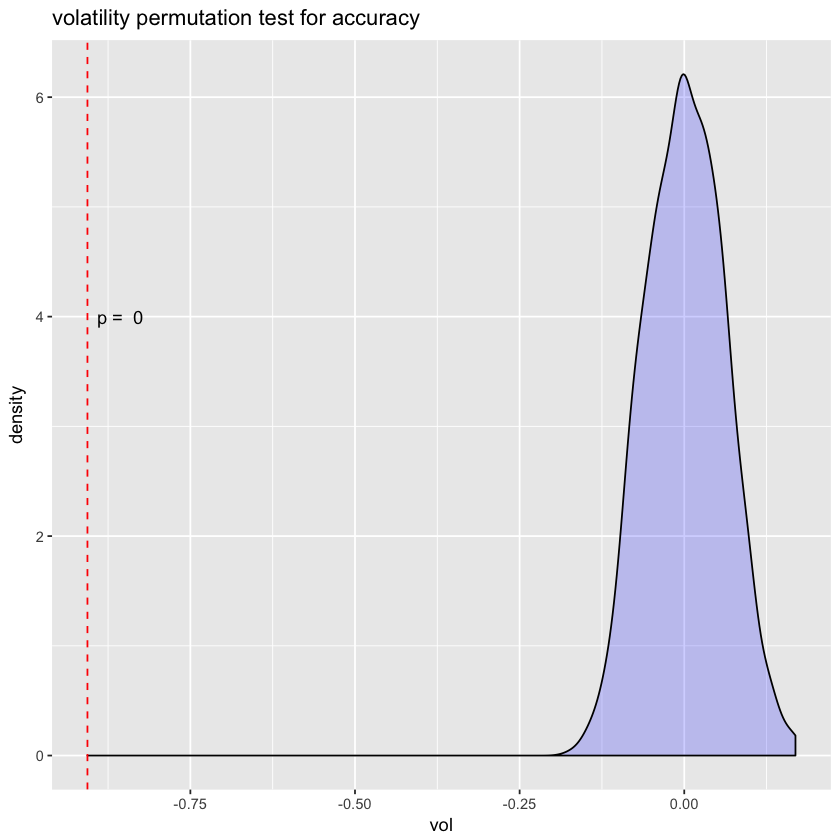

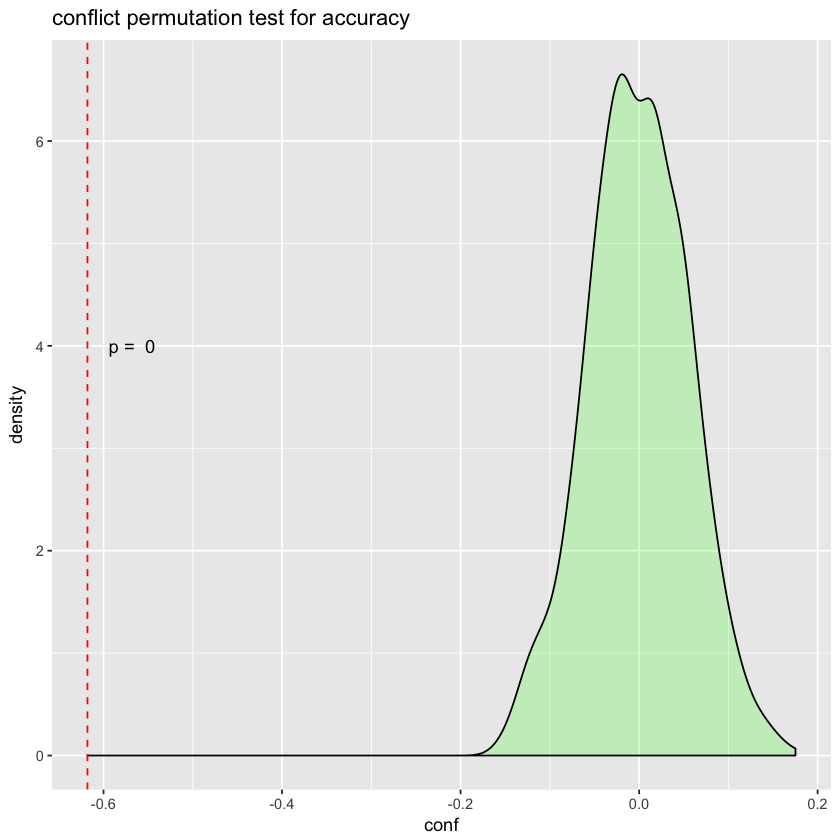

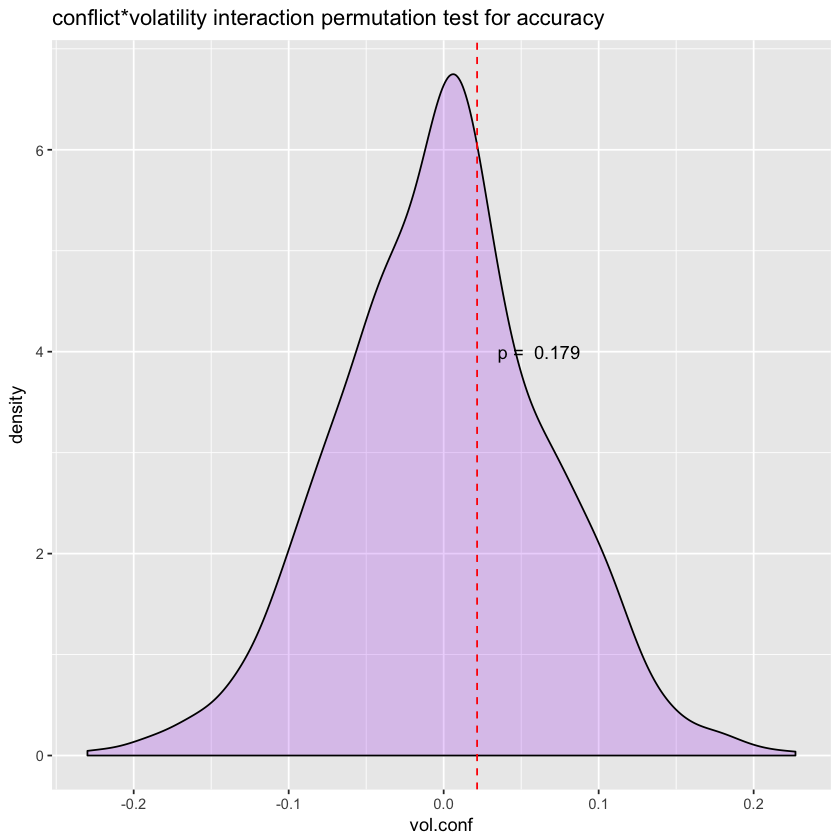

In [606]:

ggplot(as.data.frame(perm_vol.coefs), aes(x = vol)) +
geom_density(fill='blue', alpha=0.2) + annotate("text", label = paste("p = ", perm_volatility_p), x = log_results[2]+.05, y = 4, color = "black")+ geom_vline(xintercept = log_results[2], color='red', linetype="dashed") +  ggtitle('volatility permutation test for accuracy') 

ggplot(as.data.frame(perm_conf.coefs), aes(x = conf)) +
geom_density(fill='green', alpha=0.2) + geom_vline(xintercept = log_results[3]-.05, color='red',linetype="dashed")+ annotate("text", label = paste("p = ", perm_conflict_p), x = log_results[3], y = 4, color = "black") + ggtitle('conflict permutation test for accuracy')


ggplot(as.data.frame(perm_conf.vol.coefs), aes(x = vol.conf)) +
geom_density(fill='purple', alpha=0.2) + geom_vline(xintercept = log_results[4]-.04, color='red', linetype="dashed") + annotate("text", label = paste("p = ", perm_conf.vol_p), x = log_results[4], y = 4, color = "black")+ ggtitle('conflict*volatility interaction permutation test for accuracy')

## Conduct mixed effects linear regression for reaction time 

### Test assumption of normality & transform 

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



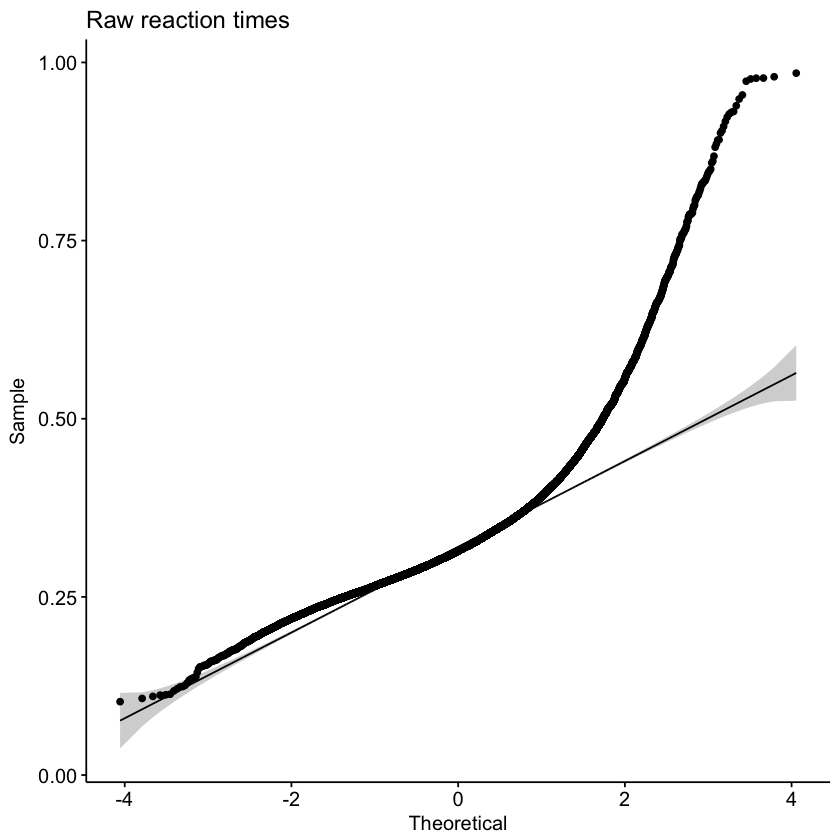

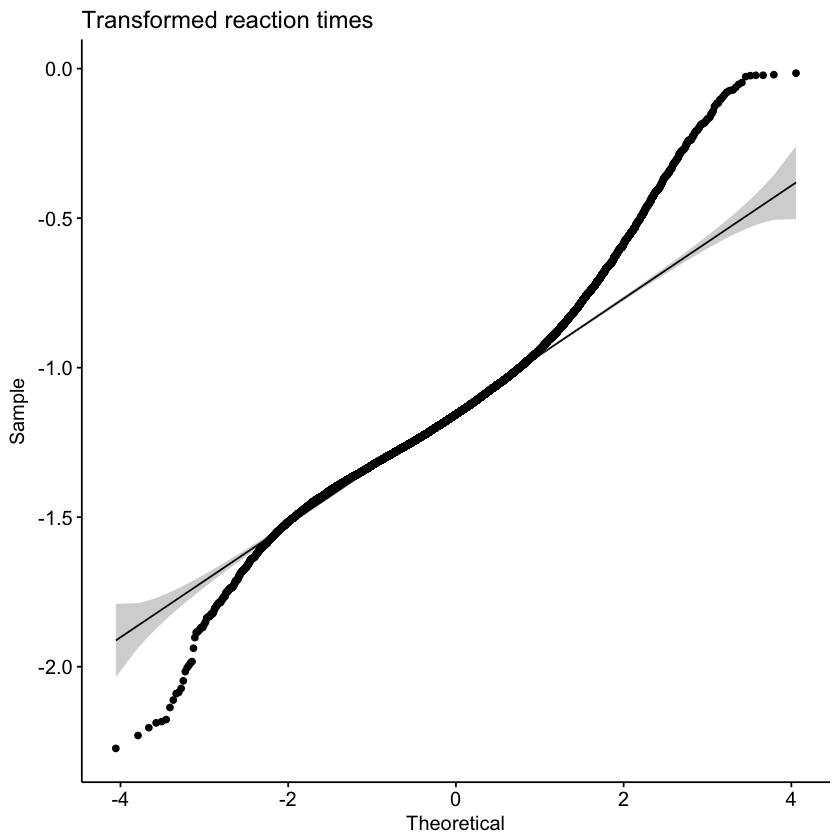

In [279]:
require(ggpubr)
sparse_df$log.rt <- log(sparse_df$rt) 
ggqqplot(sparse_df$rt, title='Raw reaction times'); ggqqplot(sparse_df$log.rt, title='Transformed reaction times')

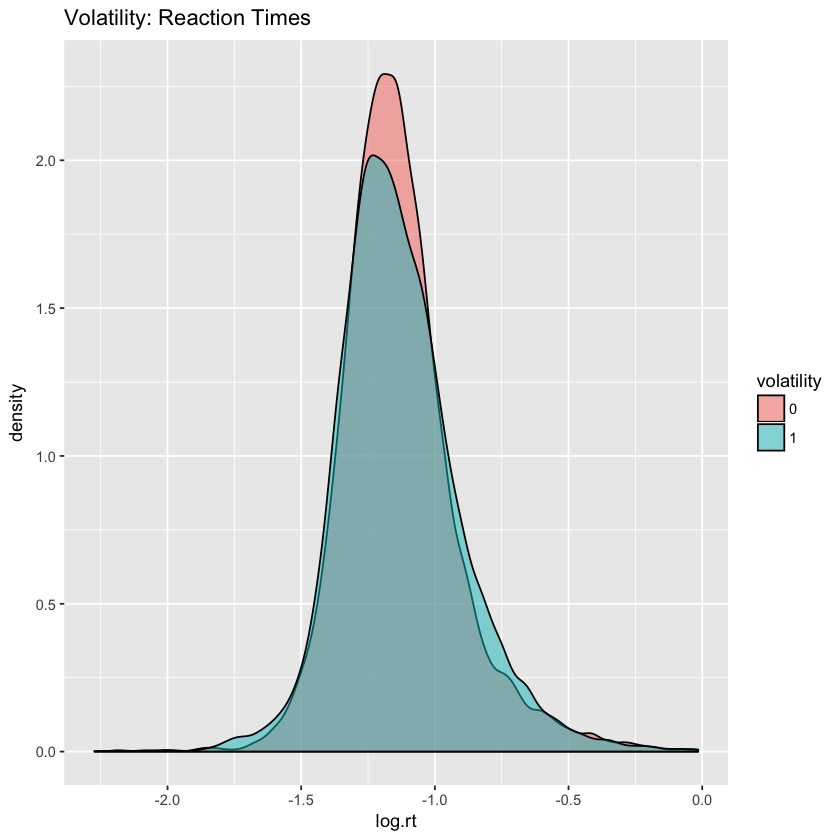

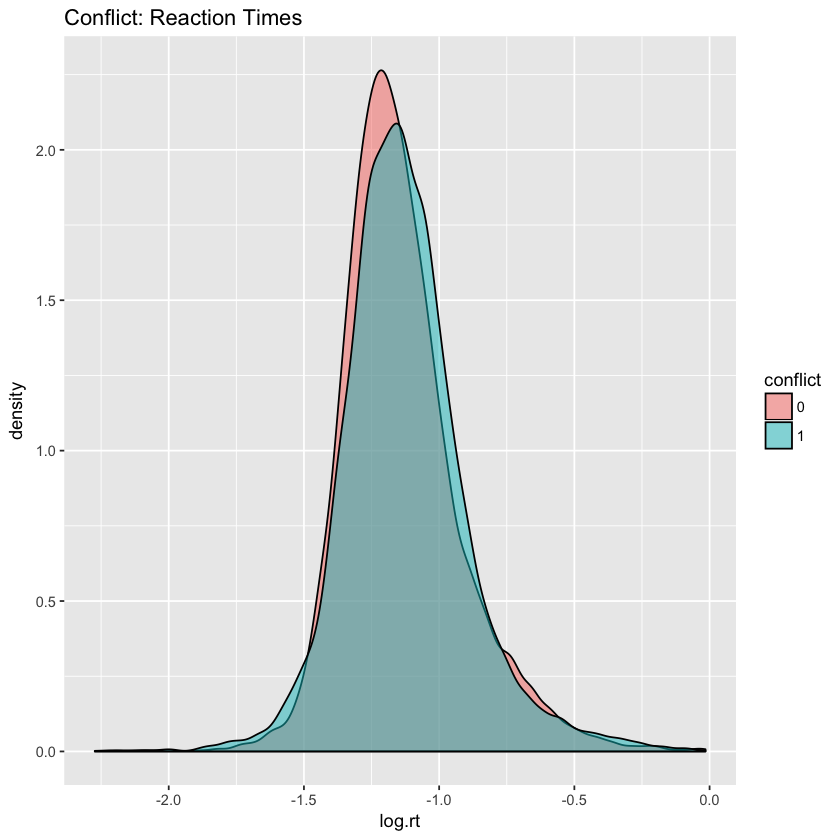

In [280]:
ggplot(sparse_df, aes(x = log.rt, fill = volatility)) + geom_density(alpha = 0.5) + ggtitle('Volatility: Reaction Times')
ggplot(sparse_df, aes(x = log.rt, fill = conflict)) + geom_density(alpha = 0.5)+ ggtitle('Conflict: Reaction Times')

### Estimate coefficients using transformed reaction times 

In [284]:
require(lme4)
rt_lm <- lmer(log.rt ~ volatility + conflict + volatility*conflict + 
    (1 | ID), data=sparse_df)
(rt_lm_summary <- summary(rt_lm))

Linear mixed model fit by REML ['lmerMod']
Formula: log.rt ~ volatility + conflict + volatility * conflict + (1 |      ID)
   Data: sparse_df

REML criterion at convergence: -6327.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1790 -0.5988 -0.0787  0.5092  5.6221 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.008723 0.0934  
 Residual             0.042539 0.2062  
Number of obs: 20000, groups:  ID, 5

Fixed effects:
                       Estimate Std. Error t value
(Intercept)           -1.126678   0.041870 -26.909
volatility1           -0.023182   0.004125  -5.620
conflict1             -0.013652   0.004125  -3.310
volatility1:conflict1  0.051967   0.005834   8.908

Correlation of Fixed Effects:
            (Intr) vltlt1 cnflc1
volatility1 -0.049              
conflict1   -0.049  0.500       
vltlty1:cn1  0.035 -0.707 -0.707

### Bootstrapped confidence intervals

In [522]:
rt_formula <- log.rt ~ volatility + conflict + conf.vol + 
    (1 | ID)

lm_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- lmer(log.rt ~ volatility + conflict + volatility*conflict + 
    (1 | ID), data=d)
  return(fixef(fit))
} 

# bootstrapping with 1000 replications 
(lm_boot_results <- boot(formula=rt_formula,data=sparse_df, 
  	R=1000,statistic=lm_coef ))


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sparse_df, statistic = lm_coef, R = 1000, formula = rt_formula)


Bootstrap Statistics :
       original        bias    std. error
t1* -1.12667782  2.572273e-05 0.002783861
t2* -0.02318232 -1.521034e-04 0.003924170
t3* -0.01365167  4.320373e-05 0.003996861
t4*  0.05196671  2.316748e-04 0.005774920

In [523]:
rt_lm_results
lm_boot_results

(Intercept)           volatility1             conflict1 
          -1.12667782           -0.02318232           -0.01365167 
volatility1:conflict1 
           0.05196671


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sparse_df, statistic = lm_coef, R = 1000, formula = rt_formula)


Bootstrap Statistics :
       original        bias    std. error
t1* -1.12667782  2.572273e-05 0.002783861
t2* -0.02318232 -1.521034e-04 0.003924170
t3* -0.01365167  4.320373e-05 0.003996861
t4*  0.05196671  2.316748e-04 0.005774920

In [524]:
# get 95% confidence interval for each coefficient
rt_intercept_boot_ci <-boot.ci(lm_boot_results, type="perc", index=1) # intercept 
rt_vol_boot_ci <-boot.ci(lm_boot_results, type="perc", index=2) # volatility 
rt_conf_boot_ci <- boot.ci(lm_boot_results, type="perc", index=3) # conflict
rt_vol.conf_boot_ci <- boot.ci(lm_boot_results, type="perc", index=4) # vol:conflict interaction 

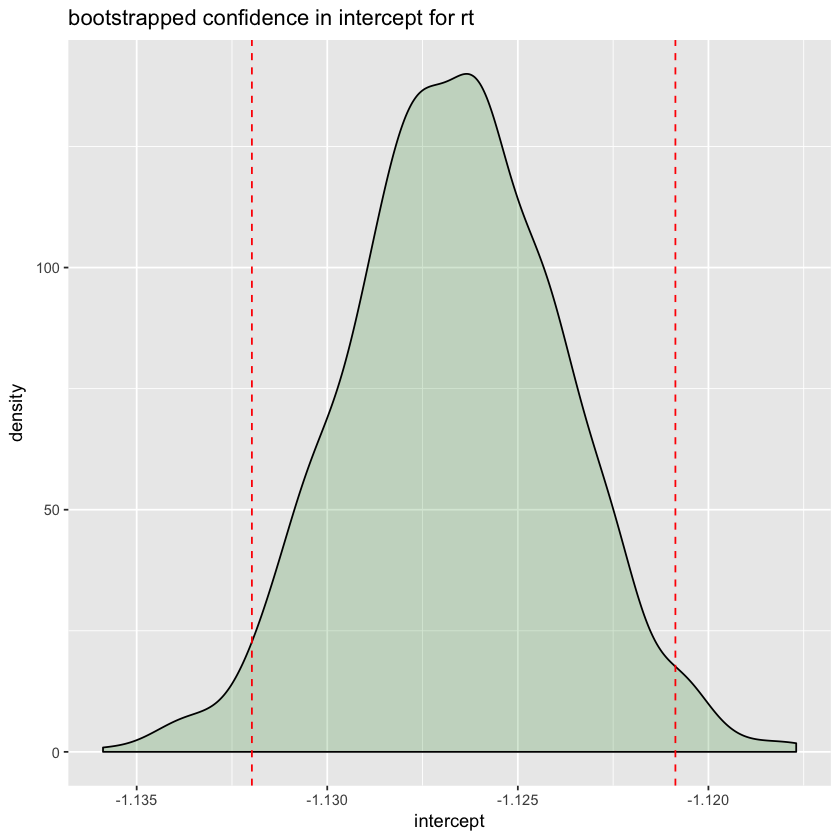

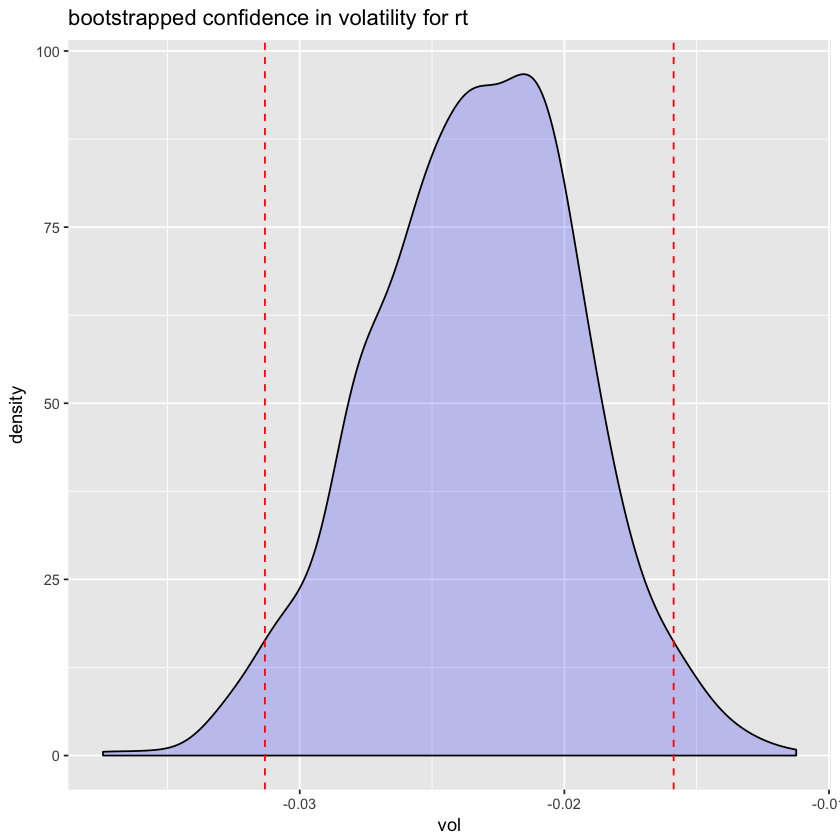

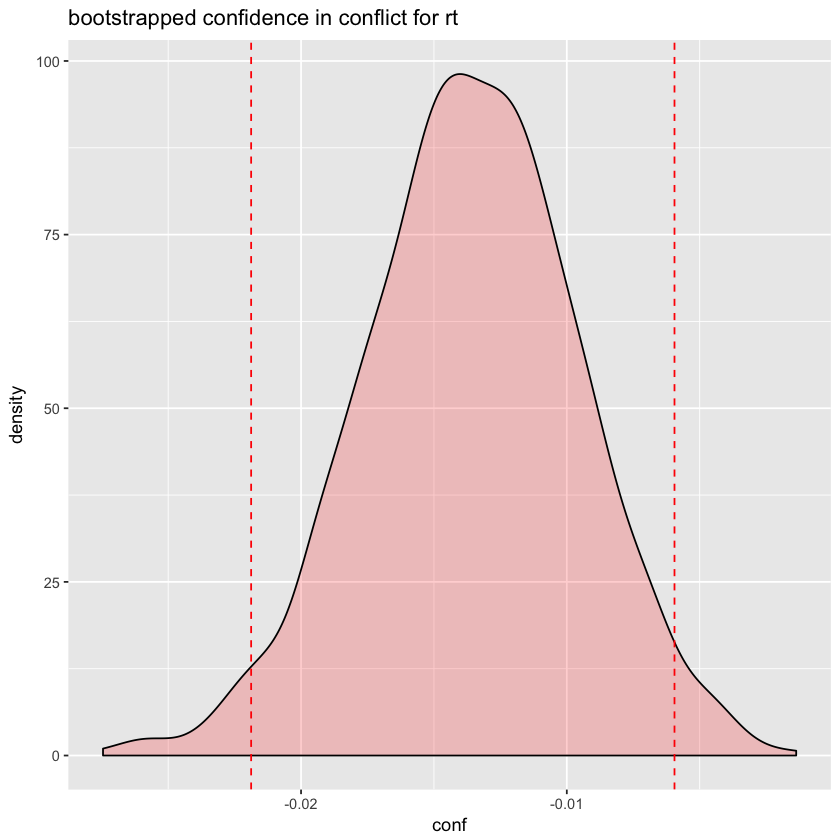

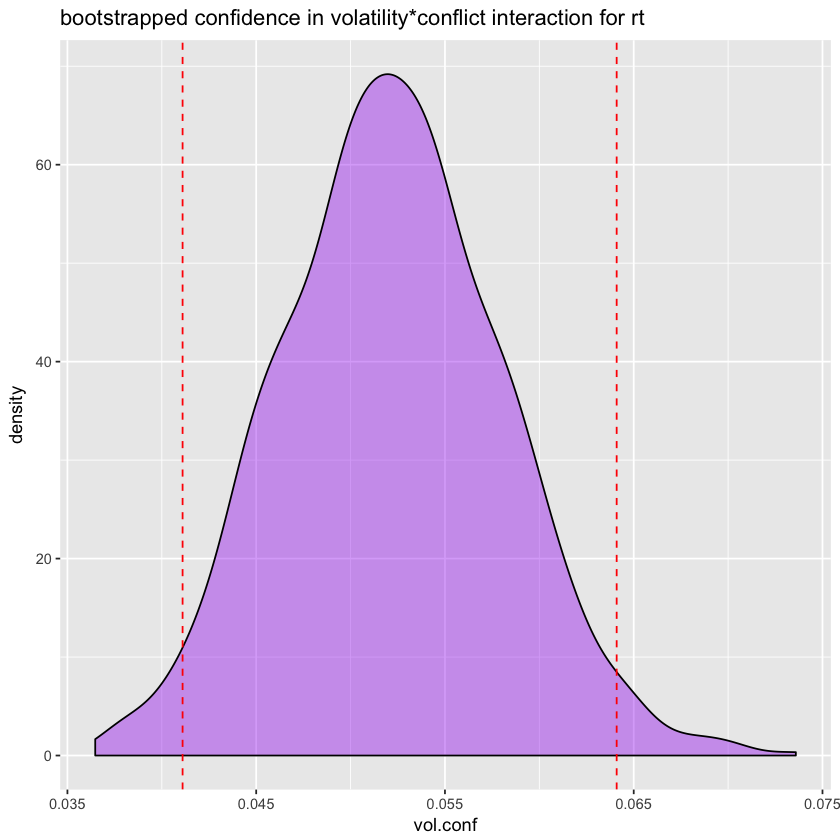

In [604]:
lm_boot_coefs <- data.frame(lm_boot_results$t)
colnames(lm_boot_coefs) <- c('intercept', 'vol', 'conf', 'vol.conf')

ggplot(lm_boot_coefs, aes(x = intercept)) + geom_density(fill='forestgreen', alpha=0.2) + 
geom_vline(xintercept=rt_intercept_boot_ci$perc[4:5], linetype='dashed', color='red') + ggtitle('bootstrapped confidence in intercept for rt ')

ggplot(lm_boot_coefs, aes(x = vol)) + geom_density(fill='blue', alpha=0.2) + 
geom_vline(xintercept=rt_vol_boot_ci$perc[4:5], linetype='dashed', color='red')+ ggtitle('bootstrapped confidence in volatility for rt ')

ggplot(lm_boot_coefs, aes(x = conf)) + geom_density(fill='red', alpha=0.2) + 
geom_vline(xintercept=rt_conf_boot_ci$perc[4:5], linetype='dashed', color='red')+ ggtitle('bootstrapped confidence in conflict for rt ')

ggplot(lm_boot_coefs, aes(x = vol.conf)) + geom_density(fill='purple', alpha=0.4) + 
geom_vline(xintercept=rt_vol.conf_boot_ci$perc[4:5], linetype='dashed', color='red')+ ggtitle('bootstrapped confidence in volatility*conflict interaction for rt ')

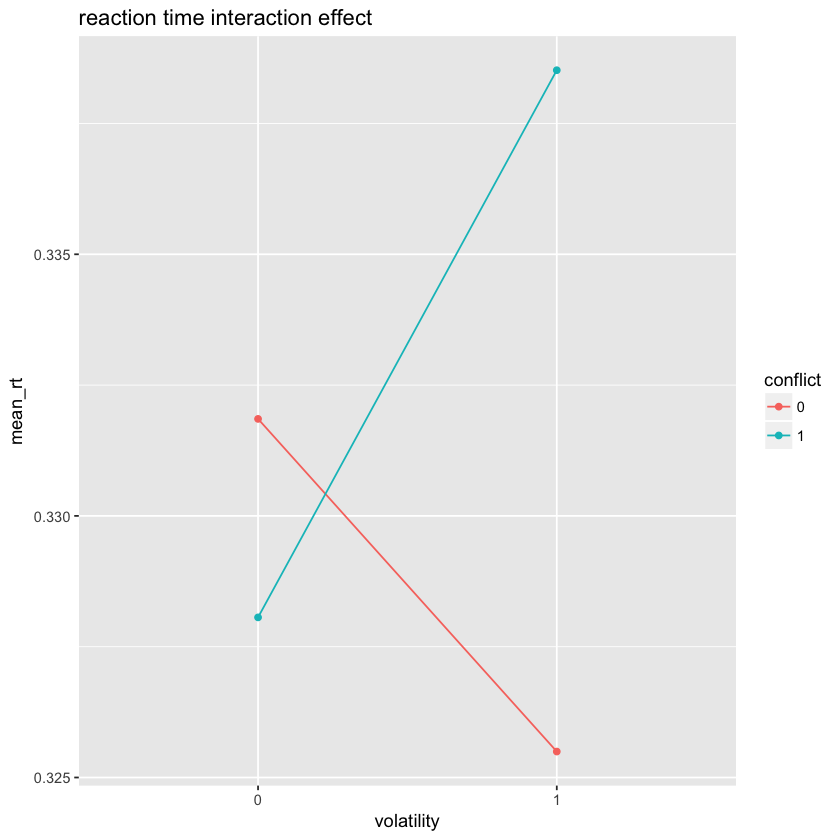

In [557]:
sparse_df %>% 
  group_by(conflict, volatility) %>% 
  summarise(mean_rt = mean(rt)) -> rt2

rt2 %>% 
  ggplot() +
  aes(x = volatility, y = mean_rt, color = conflict) +
  geom_line(aes(group = conflict)) +
  geom_point() + ggtitle('reaction time interaction effect')

### Permutation tests 

In [300]:
#permutation testing
permuted_vol_data = sparse_df
permuted_conf_data = sparse_df
permuted_conf.vol_data = sparse_df

#n_iterations
R=1000
n_samples = nrow(sparse_df)

# ncol is the number of coefficients,4 
perm_vol.coefs_rt =matrix(NA,nrow=R, ncol=4)
perm_conf.coefs_rt=matrix(NA,nrow=R, ncol=4)
perm_conf.vol.coefs_rt=matrix(NA,nrow=R, ncol=4)

In [301]:
#scramble volatility 
#null: no relationship between volatility & rt
for (i in 1:R){
  permuted_vol_data$volatility=sparse_df$volatility[sample(n_samples)]
  perm_vol.coefs_rt[i,]=fixef(lmer(rt ~ volatility + conflict + conf.vol + (1|ID), 
    data = permuted_vol_data))
}

#scramble conflict 
#null: no relationship between conflict & rt
for (i in 1:R){
  permuted_conf_data$conflict=sparse_df$conflict[sample(n_samples)]
  perm_conf.coefs_rt[i,]=fixef(lmer(rt ~ volatility + conflict + conf.vol + (1|ID), 
    data = permuted_conf_data))
}

#scramble interaction 
#null: no relationship between interaction of volatility & conflict and rt
for (i in 1:R){
  permuted_conf.vol_data$conf.vol=sparse_df$conf.vol[sample(n_samples)]
  perm_conf.vol.coefs_rt[i,]=fixef(lmer(rt ~ volatility + conflict + conf.vol + (1|ID), 
    data = permuted_conf.vol_data))
}


In [564]:
#estimate effect compared to chance. 
#for each permutation, compare results 
#only x% of permuted data is greater/less than real coeff. 
colnames(perm_vol.coefs_rt) <- c('intercept', 'vol', 'conf', 'vol.conf')
colnames(perm_conf.coefs_rt) <- c('intercept', 'vol', 'conf', 'vol.conf')
colnames(perm_conf.vol.coefs_rt) <- c('intercept', 'vol', 'conf', 'vol.conf')

# perm_vol_intercept_p <- sum(perm_vol.coefs_rt[,1] > log_results[1])/R
rt_perm_volatility_p <- sum(perm_vol.coefs_rt[,2] < rt_lm_results[2])/R
rt_perm_conflict_p <- sum(perm_conf.coefs_rt[,3] < rt_lm_results[3])/R
rt_perm_conf.vol_p <- sum(perm_conf.vol.coefs_rt[,4] > rt_lm_results[4])/R

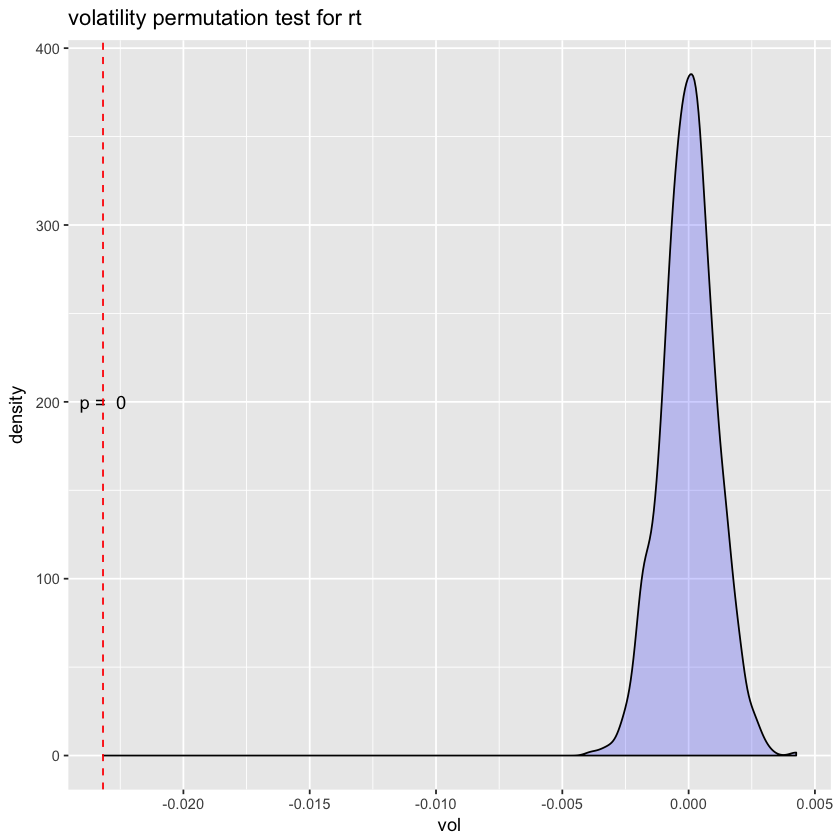

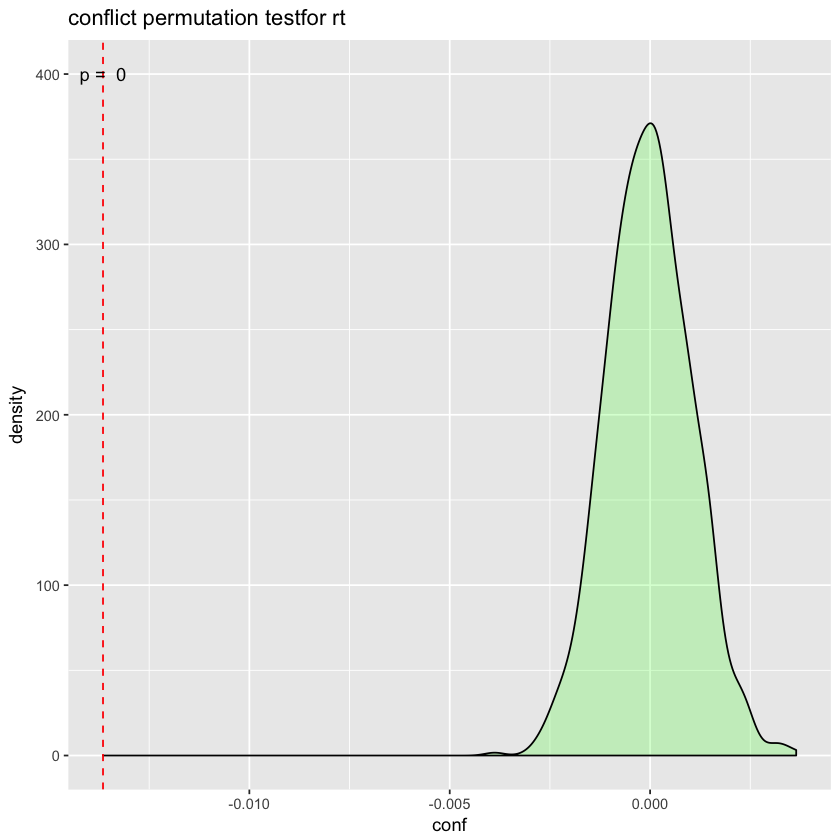

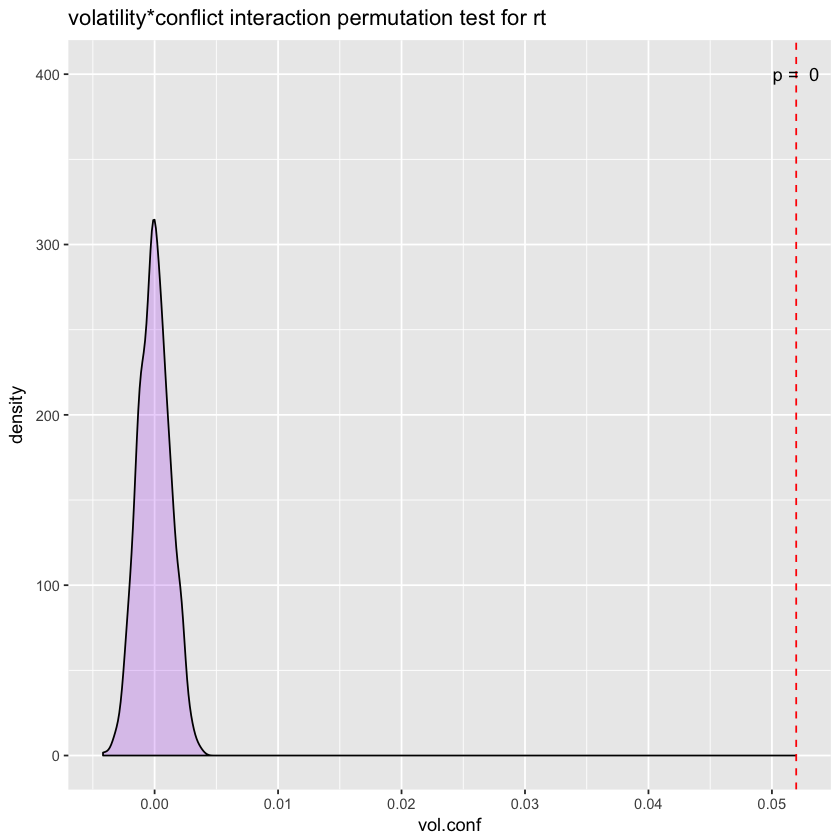

In [605]:
ggplot(as.data.frame(perm_vol.coefs_rt), aes(x = vol)) +
geom_density(fill='blue', alpha=0.2) + annotate("text", label = paste("p = ", rt_perm_volatility_p), x = rt_lm_results[2], y = 200, color = "black")+ geom_vline(xintercept = rt_lm_results[2], color='red', linetype="dashed")+ggtitle('volatility permutation test for rt ')

ggplot(as.data.frame(perm_conf.coefs_rt), aes(x = conf)) +
geom_density(fill='green', alpha=0.2) + geom_vline(xintercept = rt_lm_results[3], color='red',linetype="dashed")+ annotate("text", label = paste("p = ", rt_perm_conflict_p), x = rt_lm_results[3], y = 400, color = "black")+ggtitle('conflict permutation testfor rt ')


ggplot(as.data.frame(perm_conf.vol.coefs_rt), aes(x = vol.conf)) +
geom_density(fill='purple', alpha=0.2) + geom_vline(xintercept = rt_lm_results[4], color='red', linetype="dashed") + annotate("text", label = paste("p = ", rt_perm_conf.vol_p), x = rt_lm_results[4], y = 400, color = "black") + ggtitle('volatility*conflict interaction permutation test for rt ')

## **Conclusions**

**Do high volatility conditions increase accuracy?**
* No, participants in high volatility conditions were about 60% less likely (odds of accuracy for high volatility group = 0.4) to respond accurately than in low volatility conditions.

**Do high conflict conditions decrease accuracy?**
* Yes, in high conflict conditions, participants were 44% less likely (odds of accuracy for high conflict group = 0.56) to respond accurately than in low conflict conditions. 

* Volatility and conflict did not interact to affect accuracy.
* Converting odds to probability, low conflict and low volatility conditions were accurate 97% of the time. 

**Do high volatility or high conflict conditions increase reaction time?**
* When volatility and conflict were low, the mean reaction time was 0.32 s. 
* Volatility and conflict interacted to affect reaction time. Reaction times were greatest when the environment was volatile and options were high-conflict. Reaction times were lowest when in a low conflict, low volatility environment and moderate in a low volatility, high conflict environment and a high volatility low conflict environment. Overall, though, these effects were small, with a maximum difference in reaction times of 0.01 s. 

Overall, the magnitude of the effects of conflict and volatility may be obscured simply because the task wasn't especially volatile and it didn't induce a great degree of conflict  (lowest average accuracy was ~91% in the high volatility condition).


## Quantifying the **amount** of statistical evidence for competing models with the Bayes Factor

### reaction time 

In [391]:
# library(brms)
# fit1 <- brm(accuracy ~ volatility + conflict * conf.vol + (1|ID), 
#             data = sparse_df, family = binomial())

Using the maximum response value as the number of trials.
Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.
Compiling the C++ model
Start sampling


In [356]:
names(sparse_df)

[1] "trial"      "ID"         "condition"  "rt"         "accuracy"  
[6] "volatility" "conflict"   "conf.vol"   "log.rt"

In [359]:
#instead of calculating a nonparametric p-value, can calculate a bayes factor, 
#which quantifies amount of stat. evidence for competing models 
library(BayesFactor)
sparse_df$ID = factor(sparse_df$ID)  

full_BF = lmBF(log.rt ~ volatility + conflict + conf.vol + ID, data = sparse_df, whichRandom = "ID")
null_BF = lmBF(log.rt ~ 1 + ID, data = sparse_df, whichRandom = 'ID')
full_vs_null <- null_BF/full_BF # The Bayes factor in favor of the full model
null_vs_full <- null_BF / full_BF # The Bayes factor in favor of the null model
#strong evidence for the alternative hypothesis that one of these factors matters. 

#what about just conflict, just volatility, or the interaction? 
#is there an advantage to the full model vs. just the conflict/just the volatility/just the interaction?
conflict_BF = lmBF(log.rt ~ conflict + ID, data = sparse_df, whichRandom = 'ID')
full_vs_conflict <-  conflict_BF/full_BF  # The Bayes factor in favor of the full model

volatility_BF = lmBF(log.rt ~ volatility + ID, data = sparse_df, whichRandom = 'ID')
full_vs_vol <- volatility_BF/full_BF  # The Bayes factor in favor of the full model

volatilityConf_BF = lmBF(log.rt ~ conf.vol + ID, data = sparse_df, whichRandom = 'ID')
full_vs_confVol <-  volatilityConf_BF/full_BF  # The Bayes factor in favor of the full model

In [577]:
c(full_vs_null, full_vs_conflict, full_vs_vol, full_vs_confVol)

Bayes factor analysis
--------------
[1] 1 + ID          : 8.105053e-17 ±3.38%
[2] conflict + ID   : 9.047898e-15 ±3.5%
[3] volatility + ID : 2.036095e-18 ±3.72%
[4] conf.vol + ID   : 0.000303762  ±3.56%

Against denominator:
  log.rt ~ volatility + conflict + conf.vol + ID 
---
Bayes factor type: BFlinearModel, JZS


### accuracy

In [307]:
acc_formula <-accuracy ~ volatility + conflict + conf.vol + 
    (1 | ID)
null_formula <- accuracy ~ 1 + (1|ID)

vol_formula <- accuracy ~ volatility + (1|ID)
conf_formula <- accuracy ~ conflict + (1|ID)
conf.vol_formula <- accuracy ~ conf.vol + (1|ID)

full_log <- glmer(acc_formula, data = sparse_df, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)

null_log <- glmer(null_formula, data = sparse_df, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)

vol_log <- glmer(vol_formula, data = sparse_df, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)

conf_log <- glmer(conf_formula, data = sparse_df, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)

conf.vol_log <- glmer(conf.vol_formula, data = sparse_df, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)

In [345]:
#loglik 
#could unlog and divide
#exponentiate subtraction 
full_vs_null_BF <- exp(logLik(null_log) - logLik(full_log))
full_vs_vol_BF <- exp(logLik(vol_log) - logLik(full_log))
full_vs_conf_BF <- exp(logLik(conf_log) - logLik(full_log))
full_vs_conf.vol_BF <- exp(logLik(conf.vol_log) - logLik(full_log))

In [576]:
# full_vs_null_BF; full_vs_vol_BF; full_vs_conf_BF; full_vs_conf.vol_BF

log_bf_df <- cbind(full_vs_null_BF, full_vs_vol_BF, full_vs_conf_BF, full_vs_conf.vol_BF)

# plot(c(full_vs_null_BF, full_vs_vol_BF, full_vs_conf_BF, full_vs_conf.vol_BF))
#the volatility alone model is much better than the full model. 

# #need a plot like above. this one is misleading. 
# p <- barplot(log_bf_df, main="Bayes factors", horiz=TRUE,
#   names.arg=c("full_v_null", "full_v_vol", "full_v_conf", "full_v_conf.vol"), xpd = FALSE)


'log Lik.' 5.905692e-61 (df=2)

'log Lik.' 1.835154e-17 (df=3)

'log Lik.' 1.960269e-44 (df=3)

'log Lik.' 5.304764e-19 (df=3)

In [575]:
log_bf_df

full_vs_null_BF,full_vs_vol_BF,full_vs_conf_BF,full_vs_conf.vol_BF
5.905692e-61,1.835154e-17,1.960269e-44,5.304764e-19
